更改数据集之后 用sklearn调库实现三种核函数

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

首先使用 make_blobs 函数生成了一个包含 100 个样本、每个样本有 2 个特征的数据集。数据集的聚类中心分别设置为 (1, 1) 和 (3, 3)，通过设置 random_state 保证了数据生成的可重复性，cluster_std 控制了数据点围绕聚类中心的分散程度。
然后按照 80% 的比例将数据集划分为训练集和测试集，其中 X_train 和 y_train 分别为训练集的特征和标签，X_test 和 y_test 分别为测试集的特征和标签。

In [27]:
X, y = make_blobs(n_samples=100,
                  n_features=2,
                  centers=[(1, 1), (3, 3)],
                  random_state=42,
                  shuffle=False,
                  cluster_std=0.6)       #生成新的数据集

In [29]:
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:] #划分训练集和测试集

关于多项式核函数

In [32]:
# 多项式核函数绘图
def plot_polynomial_kernel():
    plt.figure(figsize=(10, 5))

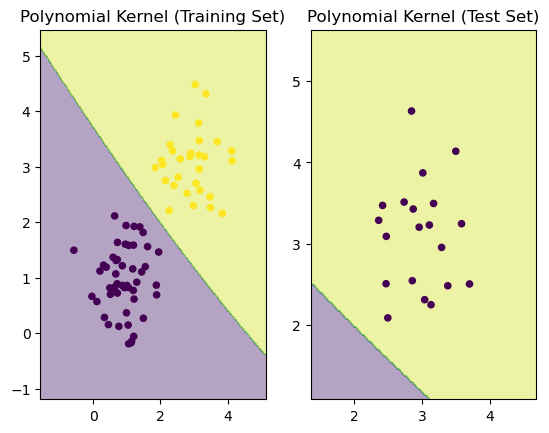

In [34]:
# 创建多项式核函数的SVC模型并进行相关绘制操作

# 创建多项式核函数的SVC模型
poly_clf = SVC(kernel='poly', degree=3, C=1.0)
poly_clf.fit(X_train, y_train)

# 在训练集上绘制决策边界和数据点
plt.subplot(1, 2, 1)
plt.title('Polynomial Kernel (Training Set)')
plot_decision_boundary(poly_clf, X_train, y_train)

# 在测试集上绘制决策边界和数据点
plt.subplot(1, 2, 2)
plt.title('Polynomial Kernel (Test Set)')
plot_decision_boundary(poly_clf, X_test, y_test)

plt.show()

关于RBF核函数

In [37]:
# RBF核函数绘图
def plot_rbf_kernel():
    plt.figure(figsize=(10, 5))


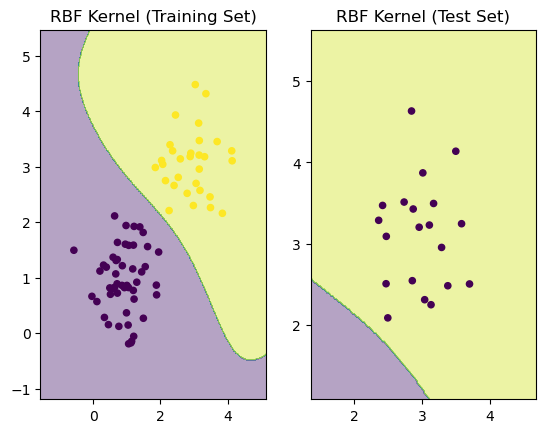

In [39]:
 # 创建RBF核函数的SVC模型
rbf_clf = SVC(kernel='rbf', gamma=0.5, C=1.0)

rbf_clf.fit(X_train, y_train)

# 在训练集上绘制决策边界和数据点
plt.subplot(1, 2, 1)
plt.title('RBF Kernel (Training Set)')
plot_decision_boundary(rbf_clf, X_train, y_train)

# 在测试集上绘制决策边界和数据点
plt.subplot(1, 2, 2)
plt.title('RBF Kernel (Test Set)')
plot_decision_boundary(rbf_clf, X_test, y_test)
plt.show()

线性核函数

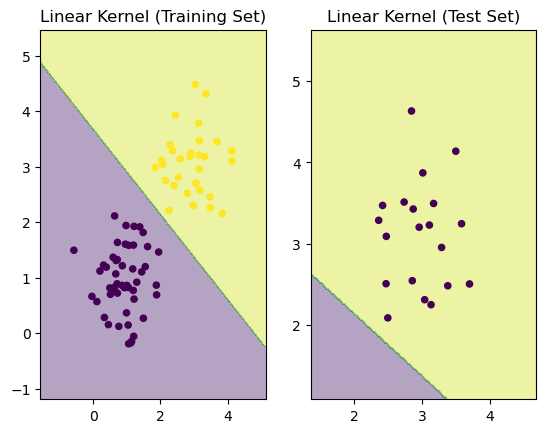

In [53]:
# 线性核函数绘图
def plot_linear_kernel():
    plt.figure(figsize=(10, 5))

# 创建线性核函数的SVC模型
linear_clf = SVC(kernel='linear', C=1.0)
linear_clf.fit(X_train, y_train)

# 在训练集上绘制决策边界和数据点
plt.subplot(1, 2, 1)
plt.title('Linear Kernel (Training Set)')
plot_decision_boundary(linear_clf, X_train, y_train)

# 在测试集上绘制决策边界和数据点
plt.subplot(1, 2, 2)
plt.title('Linear Kernel (Test Set)')
plot_decision_boundary(linear_clf, X_test, y_test)

plt.show()

In [55]:

# 绘制决策边界的辅助函数
def plot_decision_boundary(clf, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20)

# 调用函数绘制多项式核函数和RBF核函数的决策边界
plot_polynomial_kernel()
plot_rbf_kernel()

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>